# TFT synergy graph

Functions to help you craft your TFT (Teamfight Tactics) teams in real time. TFT is a game with characters from League of Legends, where you craft your team of characters with 'synergies' to try to win battles against other teams.

I got the synergies from copying and pasting from this website: https://tftactics.gg/db/champions.

This needs to be run with jupyter notebook, not jupyter lab! It might be related to this: https://github.com/mwcraig/ipyevents/issues/56#issuecomment-691587775

In [12]:
from tft_synergies_helper import *

# setup
synergies_df = parse_synergies()
nodes = list(synergies_df.keys())
all_synergies = get_all_synergies(synergies_df)
synergy_to_node = get_synergy_to_node(all_synergies, synergies_df, nodes)
edges, unique_edges = get_edges(synergies_df, synergy_to_node, nodes)

# now to make the graph
G, edge_labels, edge_col, col_map = get_graph(nodes, unique_edges, all_synergies)
synergy_info_dict, synergy_to_numbers = get_synergy_info()

## Firstly, input your current team

Click on the characters in your current team! 

If you add one by mistake, just click it again to remove it from your team.

In [13]:
# make team by clicking on characters

# based on demo from here: https://github.com/mwcraig/ipyevents/blob/master/doc/Widget%20DOM%20Events.ipynb
def make_team(nodes):
    global team # I think this needs to be global, as we can't return it from this function as it is an event handler thingy
    team = [] # reset team

    im_events, vbox, coordinates = prep_team_image()

    def update_coords(event):
        col = int(event['dataX']/(1753/10)) # indexed from 0
        row = int(event['dataY']/(1416/6)) # indexed from 0
        char = get_char_name(col, row, nodes)
        if char in team: # if its in the team, remove it
            team.remove(char)
        else:
            team.append(char)
    #     coordinates.value = '<h3>Clicked at ({}, {}). Col is {} and Row is {}</h3>'.format(event['dataX'], event['dataY'], col, row)
        team_string = ', '.join(team)
        coordinates.value = '<h3>You clicked {}!<br /><br />Your team is now: <b>{}</b></h3>'.format(char, team_string)
        return(char)

    im_events.on_dom_event(update_coords)

    return(vbox)

team = []
make_team(nodes)

# See your team graph here - your team members will be bold

Nodes are team members (characters), and two characters have an edge between them if they share a synergy. The edge colours are the different synergies (see the key).

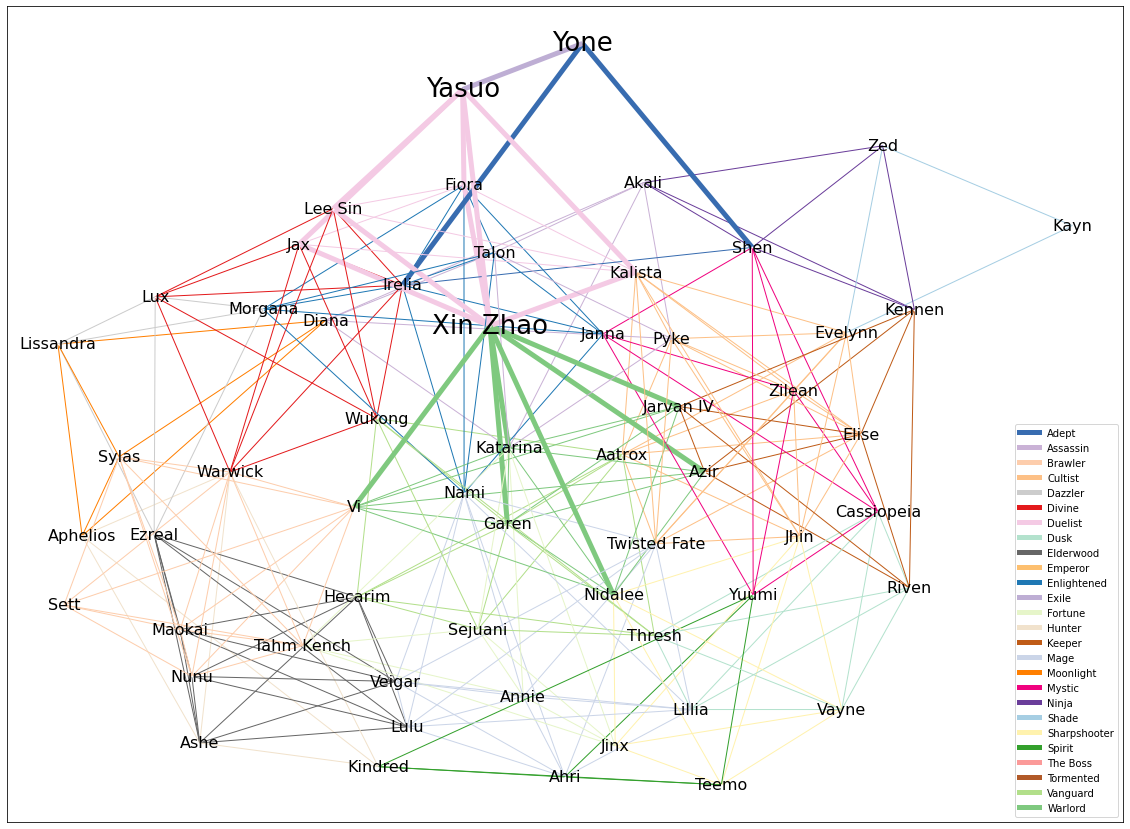

In [16]:
make_graph(G, team, nodes, edge_col, col_map)

## Here are suggestions for team additions and replacements

In [17]:
# suggestions are here:

only_include_level_ups = False # do you only care about suggestions that give you the next level up in a synergy? If so, set this as True

dfs = suggest_team_additions_for_user(team, synergies_df, synergy_to_numbers, nodes, only_include_level_ups=only_include_level_ups)
print('If you want to only add 1 new team member:')
dfs[0]
print('Good options for adding 2 new team members:')
dfs[1].head(20)

print('Or if you want to replace a team member:')
dfs_replace = suggest_team_replacements_for_user(team, synergies_df, synergy_to_numbers, nodes, only_include_level_ups=only_include_level_ups)
dfs_replace[0]
print('Or if you want to replace two team members!')
dfs_replace[1].head(20)


If you want to only add 1 new team member:


,Possible addition,extra synergies
0,Shen,Adept (1)
1,Fiora,Duelist (1)
2,Azir,Warlord (1)
3,Jax,Duelist (1)
4,Jarvan IV,Warlord (1)
5,Lee Sin,Duelist (1)
6,Garen,Warlord (1)
7,Kalista,Duelist (1)
8,Vi,Warlord (1)
9,Katarina,Warlord (1)


Good options for adding 2 new team members:


,Possible addition,extra synergies
0,"Irelia, Jarvan IV","Warlord (1), Adept (1)"
1,"Irelia, Lee Sin","Duelist (1), Adept (1)"
2,"Kalista, Jax",Duelist (2)
3,"Kalista, Azir","Warlord (1), Duelist (1)"
4,"Irelia, Shen",Adept (2)
5,"Kalista, Fiora",Duelist (2)
6,"Irelia, Fiora","Duelist (1), Adept (1)"
7,"Kalista, Shen","Duelist (1), Adept (1)"
8,"Irelia, Azir","Warlord (1), Adept (1)"
9,"Garen, Lee Sin","Warlord (1), Duelist (1)"


Or if you want to replace a team member:


,Possible addition,To remove,extra synergies
0,Katarina,Yone,Warlord (1)
1,Azir,Yone,Warlord (1)
2,Irelia,Yasuo,Adept (1)
3,Katarina,Yasuo,Warlord (1)
4,Azir,Yasuo,Warlord (1)
5,Shen,Yasuo,Adept (1)
6,Irelia,Xin Zhao,Adept (1)
7,Shen,Xin Zhao,Adept (1)


Or if you want to replace two team members!


,Possible addition,To remove,extra synergies
0,"Azir, Shen","Yasuo, Yone",Warlord (1)
1,"Irelia, Katarina","Yasuo, Yone",Warlord (1)
2,"Irelia, Azir","Yasuo, Yone",Warlord (1)
3,"Katarina, Shen","Yasuo, Yone",Warlord (1)
4,"Warwick, Azir","Yasuo, Yone",Warlord (1)
5,"Warwick, Katarina","Yasuo, Yone",Warlord (1)
6,"Katarina, Azir","Yasuo, Yone",Warlord (2)
7,"Katarina, Shen","Xin Zhao, Yasuo",Adept (1)
8,"Azir, Shen","Xin Zhao, Yasuo",Adept (1)
9,"Irelia, Warwick","Xin Zhao, Yasuo",Adept (1)
